In [0]:
# Classifying digits with Neural Nets - CNN

In [0]:
# Libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Load, split (train, test) data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Shape of data
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# An Image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# See the label of the image
y_train[0]

5

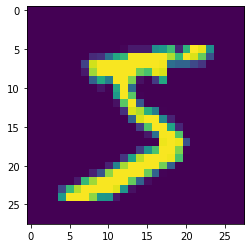

In [8]:
# 28 x 28 image of number
plt.imshow(X_train[0])

In [0]:
# Reshape to fit to 28x28
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
# One hot encoding for labels - set of 10 numbers
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [13]:
# Value is one at index of 5
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
# CNN
model = Sequential()

# Add layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
# Flatten converts images to one dimensional vector 
model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [15]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [16]:
# Train model
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/3





60000/60000 [==============================] - 168s 3ms/step - loss: 3.7435 - acc: 0.7452 - val_loss: 0.0848 - val_acc: 0.9742
Epoch 2/3
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0708 - acc: 0.9796 - val_loss: 0.0717 - val_acc: 0.9802
Epoch 3/3
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0727 - val_acc: 0.9820


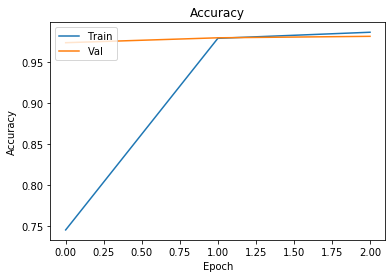

In [19]:
# Visualize the accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

In [28]:
# Predictions - 4 images in test

predictions = model.predict(X_test[:9])
predictions

array([[4.42030679e-09, 7.80532594e-14, 4.22759354e-12, 5.54145263e-09,
        1.86093867e-14, 2.20779172e-14, 7.33438189e-22, 1.00000000e+00,
        4.73301866e-12, 7.04246605e-10],
       [1.36047033e-12, 6.45697038e-11, 1.00000000e+00, 3.44724410e-16,
        3.78504415e-17, 5.60628489e-23, 6.40640707e-10, 2.53852909e-20,
        1.45839937e-13, 2.14990623e-20],
       [1.04524183e-07, 9.97760773e-01, 8.29206442e-07, 4.20715546e-10,
        2.50277735e-05, 2.24553742e-06, 6.02734529e-10, 1.24621397e-06,
        2.20977003e-03, 2.06510342e-09],
       [9.99999762e-01, 1.68770692e-11, 7.58695717e-10, 3.90939191e-12,
        2.26988228e-09, 2.20766205e-09, 1.27648008e-07, 2.20965760e-10,
        1.42505296e-09, 1.23642494e-07],
       [2.99681217e-11, 5.87494289e-11, 1.53987728e-12, 1.64141687e-14,
        9.99999523e-01, 1.75370569e-11, 9.57525007e-15, 4.89308550e-12,
        1.03164777e-09, 4.36115187e-07],
       [2.34060662e-05, 9.98312831e-01, 1.87642172e-07, 1.98139241e-10,
   

In [29]:
# First 9 images - 
print(np.argmax(predictions, axis=1))

[7 2 1 0 4 1 4 9 5]


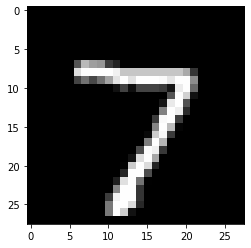

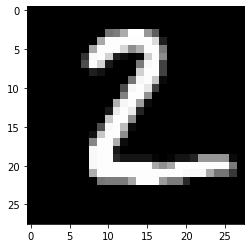

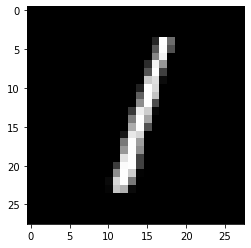

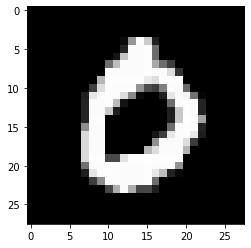

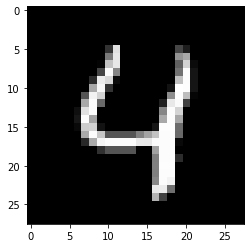

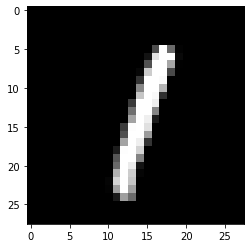

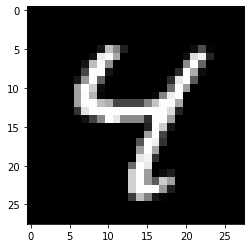

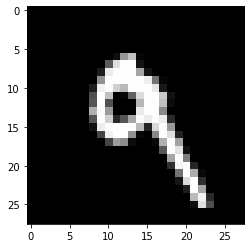

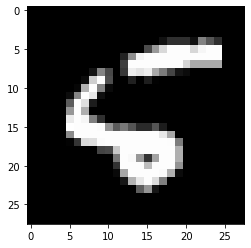

In [31]:
for i in range(0, 9):
  image = X_test[i]

  image = np.array(image, dtype='float')
  pixels = image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show() 